# Spam Filter

This dataset contains sms messages labeled as ham or spam, which is originally posted on UCI Machine Learning repository

## Data load

In [2]:
# import libraries
import pandas as pd
import numpy as np

#display first 5 rows in dataset
lines=[line for line in open('smsspamcollection/SMSSpamCollection')]
lines[:5]

['ham\tGo until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...\n',
 'ham\tOk lar... Joking wif u oni...\n',
 "spam\tFree entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's\n",
 'ham\tU dun say so early hor... U c already then say...\n',
 "ham\tNah I don't think he goes to usf, he lives around here though\n"]

In [3]:
# we can see it is tab separated with no header
# read the dataset specifying sep and column name
df = pd.read_csv('smsspamcollection/SMSSpamCollection',sep='\t', names= ['label', 'sms_message'])

#display first 5 rows
df.head()

,label,sms_message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
# check dataframe info to see if exists null value
# check the number of spam and ham emails
print(df.info())
print(df.groupby('label').count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label          5572 non-null object
sms_message    5572 non-null object
dtypes: object(2)
memory usage: 87.1+ KB
None
       sms_message
label             
ham           4825
spam           747


## Data Pre-processing

In [5]:
# convert label column to int with ham as 0 and spam as 1
df['label'] = df.label.map({'spam':1,'ham':0})

In [6]:
df.head()

,label,sms_message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
#create list of ham messages for visualization
ham = [line.rstrip() for line in df.loc[df['label']==0]['sms_message']]

# convert to lower case
ham = [line.lower() for line in ham]

# remove punctuation
import re
ham = [re.sub(r'[^\w\s]','',line) for line in ham]

In [8]:
#create list of spam messages for visualization
spam=[line for line in df.loc[df['label']==1]['sms_message']]
spam = [line.lower() for line in spam]
spam = [re.sub(r'[^\w\s]','',line) for line in spam]

## Data Visualization

In [9]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud,STOPWORDS

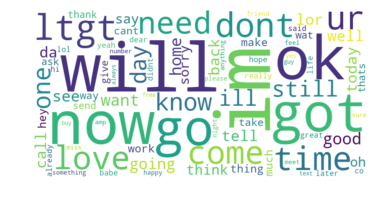

In [10]:
stopwords = set(STOPWORDS)
# create word cloud for ham messages
ham_text='\n'.join(ham)
wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words=80,width=800,
                    height=400,).generate(ham_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

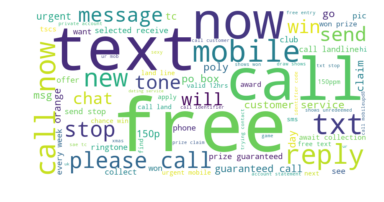

In [12]:
#create word cloud for spam messages
spam_text='\n'.join(spam)
wordcloud = WordCloud(background_color="white",stopwords=stopwords,max_words=80,width=800,
                    height=400,).generate(spam_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Create Training and Test Set

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df['sms_message'], 
                                                    df['label'], 
                                                    test_size=0.2,
                                                    random_state=14)

## Creating a Pipeline for Building Model

Classification report for Naive Bayes model: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       967
           1       0.97      0.95      0.96       148

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.98      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115



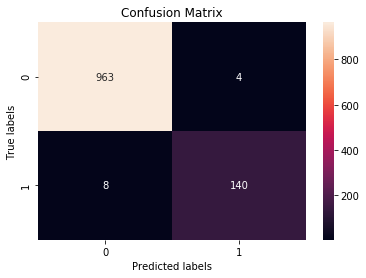

In [19]:
#create a pipeline to store process
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report,confusion_matrix
import seaborn as sns

def visual(y,y_pred):
    cm =confusion_matrix(y,y_pred)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax,fmt='g'); 
    ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
    ax.set_title('Confusion Matrix'); 

pipeline_nb = Pipeline([
    ('bow', CountVectorizer()),  # strings to bag of words matrix
    ('classifier', MultinomialNB()),  # train on Naive Bayes classifier
])

pred_nb = pipeline_nb.fit(X_train,y_train).predict(X_test)
print("Classification report for Naive Bayes model: ")
print(classification_report(y_test,pred_nb))
visual(y_test,pred_nb)

## Trying Other Classifiers

Classification report for Random Forest model: 
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       967
           1       1.00      0.78      0.87       148

   micro avg       0.97      0.97      0.97      1115
   macro avg       0.98      0.89      0.93      1115
weighted avg       0.97      0.97      0.97      1115



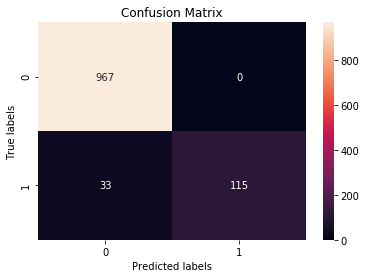

In [23]:
# import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

pipeline_rf = Pipeline([
    ('bow', CountVectorizer()),  
    ('classifier', RandomForestClassifier()),  
])

pred_rf = pipeline_rf.fit(X_train,y_train).predict(X_test)
print("Classification report for Random Forest model: ")
print(classification_report(y_test,pred_rf))
visual(y_test,pred_rf)

Classification report for KNN model: 
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       967
           1       1.00      0.33      0.50       148

   micro avg       0.91      0.91      0.91      1115
   macro avg       0.95      0.67      0.72      1115
weighted avg       0.92      0.91      0.89      1115



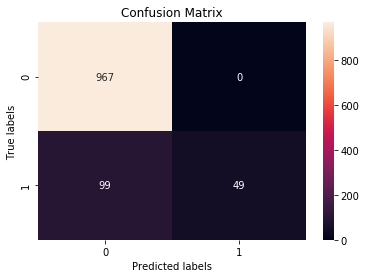

In [24]:
pipeline_knn = Pipeline([
    ('bow', CountVectorizer()),  
    ('classifier', KNeighborsClassifier()),  
])

pred_knn = pipeline_knn.fit(X_train,y_train).predict(X_test)
print("Classification report for KNN model: ")
print(classification_report(y_test,pred_knn))
visual(y_test,pred_knn)

From the classification report, we can see Naive Bayes has the highest F1 score. Therefore Naive Bayes is the optimal model for spam filter.